LAPORAN PRATIKUM Infrastruktur dan Platfrom Sains Data 

Nama : Ersa Amelia

Nim : 2311110009

Lakukan preprocessing dan visualisasi pada data diabetes dengan ketentuan :
1. Imputasi missing value dengan mean, median, dan modus
2. Cek korelasi antar variabel dengan heatmap
3. Lakukan imbalance handling dengan undersampling
4. Lakukan scaling dengan robust scaler dan minmax

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from collections import Counter


In [3]:
df=pd.read_csv(r'C:\Users\User\Downloads\diabetes - diabetes.csv')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0      NaN           72.0           35.0      0.0   NaN   
1            1.0     85.0           66.0           29.0      0.0   NaN   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0      NaN           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0      NaN  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0            NaN           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                      627.00   NaN        1  
1                

In [5]:
df.isnull().sum() #mencari nilai null/missing value

Pregnancies                  77
Glucose                     115
BloodPressure               154
SkinThickness                38
Insulin                     192
BMI                         230
DiabetesPedigreeFunction     77
Age                         154
Outcome                       0
dtype: int64

In [6]:
df_cleaned = df.dropna()
print("Jumlah missing values setelah dihapus:\n", df_cleaned.isnull().sum())
print("Jumlah baris dan kolom setelah dihapus:", df_cleaned.shape)
print(df_cleaned.head())

Jumlah missing values setelah dihapus:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Jumlah baris dan kolom setelah dihapus: (159, 9)
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2           8.0    183.0           64.0            0.0      0.0  23.3   
3           1.0     89.0           66.0           23.0     94.0  28.1   
9           8.0    125.0           96.0            0.0      0.0   0.0   
12         10.0    139.0           80.0            0.0      0.0  27.1   
16          0.0    118.0           84.0           47.0    230.0  45.8   

    DiabetesPedigreeFunction   Age  Outcome  
2                    672.000  32.0        1  
3                    167.000  21.0        0  
9                    232.000  54.0        1  
12   

In [10]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_mode = SimpleImputer(strategy='most_frequent')

In [11]:
df['Pregnancies'] = imputer_mean.fit_transform(df[['Pregnancies']])
df['Glucose'] = imputer_mean.fit_transform(df[['Glucose']])
df['BloodPressure'] = imputer_median.fit_transform(df[['BloodPressure']])
df['SkinThickness'] = imputer_median.fit_transform(df[['SkinThickness']])
df['Insulin'] = imputer_median.fit_transform(df[['Insulin']])
df['BMI'] = imputer_median.fit_transform(df[['BMI']])
df['DiabetesPedigreeFunction'] = imputer_mean.fit_transform(df[['DiabetesPedigreeFunction']])
df['Age'] = imputer_mode.fit_transform(df[['Age']])

In [13]:
print("\nData setelah imputasi:\n", df)



Data setelah imputasi:
      Pregnancies     Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6.0  120.462481           72.0           35.0      0.0  32.15   
1            1.0   85.000000           66.0           29.0      0.0  32.15   
2            8.0  183.000000           64.0            0.0      0.0  23.30   
3            1.0   89.000000           66.0           23.0     94.0  28.10   
4            0.0  120.462481           40.0           35.0    168.0  43.10   
..           ...         ...            ...            ...      ...    ...   
763         10.0  101.000000           76.0           48.0    180.0  32.90   
764          2.0  122.000000           70.0           27.0      0.0  36.80   
765          5.0  121.000000           72.0           23.0     36.0  26.20   
766          1.0  126.000000           60.0            0.0      0.0  30.10   
767          1.0   93.000000           72.0           31.0      0.0  30.40   

     DiabetesPedigreeFunction   Age  O

In [14]:
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0]


In [15]:
print("\nNilai Mean yang digunakan:\n", mean_values)
print("\nNilai Median yang digunakan:\n", median_values)
print("\nNilai Modus yang digunakan:\n", mode_values)


Nilai Mean yang digunakan:
 Pregnancies                   3.803184
Glucose                     120.462481
BloodPressure                69.569010
SkinThickness                20.643229
Insulin                      66.658854
BMI                          32.040495
DiabetesPedigreeFunction    352.519614
Age                          30.927083
Outcome                       0.348958
dtype: float64

Nilai Median yang digunakan:
 Pregnancies                   3.803184
Glucose                     120.462481
BloodPressure                72.000000
SkinThickness                23.000000
Insulin                      36.000000
BMI                          32.150000
DiabetesPedigreeFunction    336.500000
Age                          26.000000
Outcome                       0.000000
dtype: float64

Nilai Modus yang digunakan:
 Pregnancies                   1.000000
Glucose                     120.462481
BloodPressure                72.000000
SkinThickness                 0.000000
Insulin               

In [18]:
correlation_matrix = df.corr()

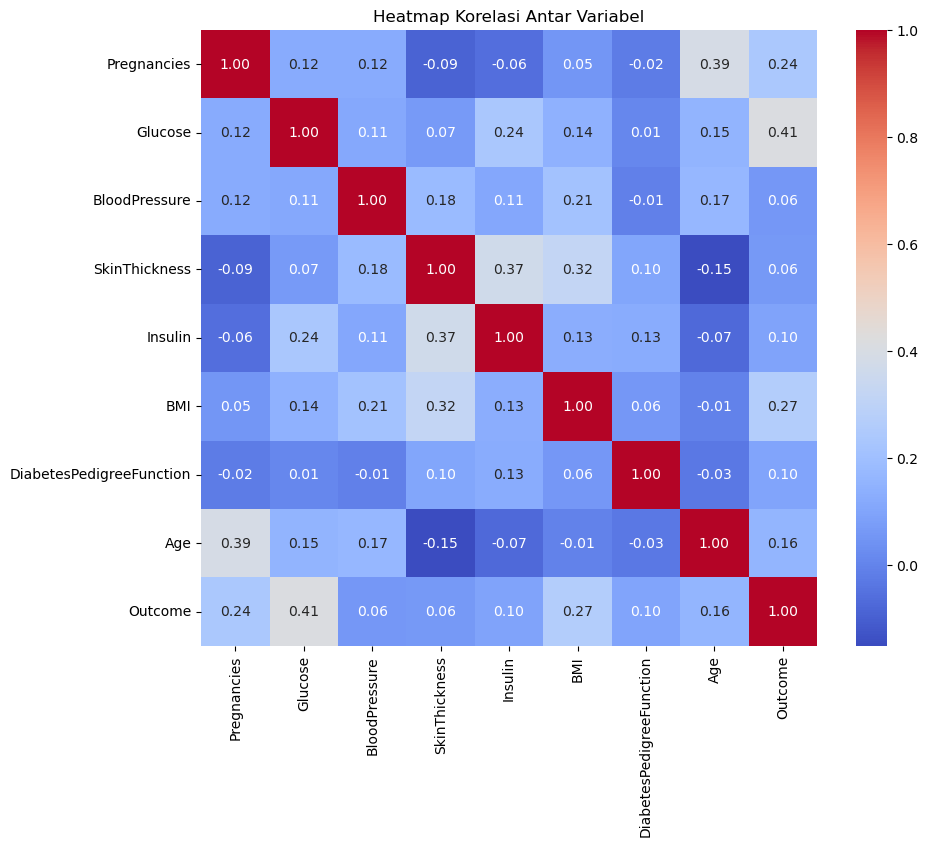

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

<Axes: >

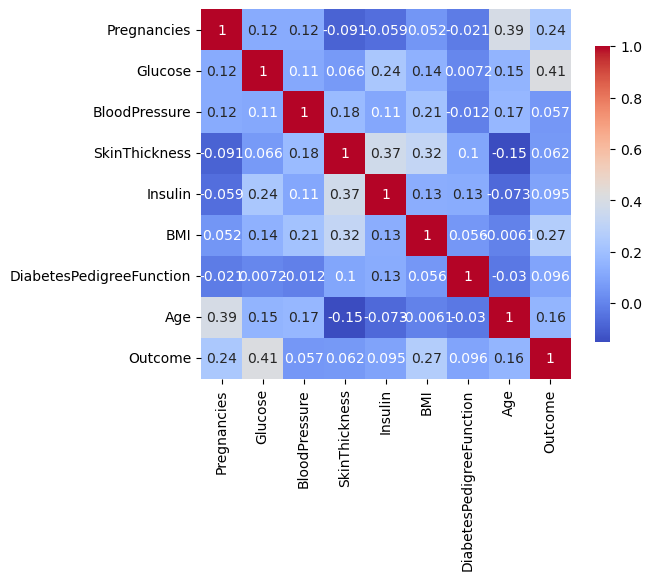

In [20]:

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink":.8})

In [21]:
df_majority = df[df['Outcome'] == 0]
df_minority = df[df['Outcome'] == 1]

In [26]:
df_majority_undersampled = df_majority.sample(len(df_minority), random_state=42)

In [27]:
df_undersampled = pd.concat([df_majority_undersampled, df_minority])


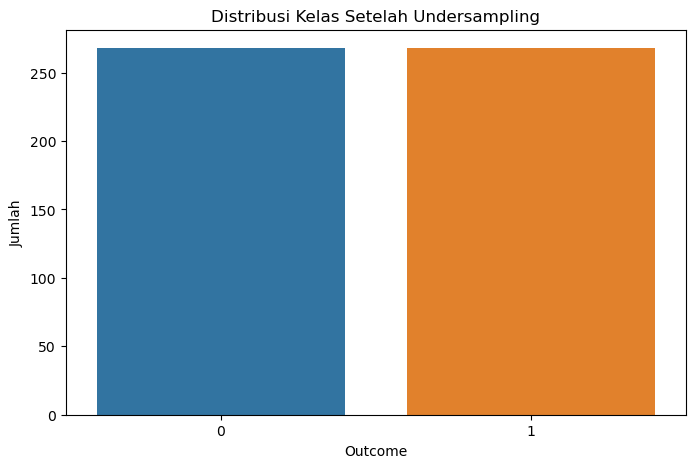

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome', data=df_undersampled)
plt.title('Distribusi Kelas Setelah Undersampling')
plt.xlabel('Outcome')
plt.ylabel('Jumlah')
plt.show()

In [19]:
df_cleaned = df.dropna()
print("Jumlah missing values setelah dihapus:\n", df_cleaned.isnull().sum())
print("Jumlah baris dan kolom setelah dihapus:", df_cleaned.shape)
print(df_cleaned.head())
print("\nData setelah imputasi:\n", df)

Jumlah missing values setelah dihapus:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Jumlah baris dan kolom setelah dihapus: (159, 9)
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2           8.0    183.0           64.0            0.0      0.0  23.3   
3           1.0     89.0           66.0           23.0     94.0  28.1   
9           8.0    125.0           96.0            0.0      0.0   0.0   
12         10.0    139.0           80.0            0.0      0.0  27.1   
16          0.0    118.0           84.0           47.0    230.0  45.8   

    DiabetesPedigreeFunction   Age  Outcome  
2                    672.000  32.0        1  
3                    167.000  21.0        0  
9                    232.000  54.0        1  
12   

In [31]:
imputer_mean = SimpleImputer(strategy='mean')
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = imputer_mean.fit_transform(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])


In [32]:
X = df.drop(columns='Outcome')
y = df['Outcome']

In [33]:
robust_scaler = RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X)

In [34]:
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)

In [35]:
X_robust_scaled_df = pd.DataFrame(X_robust_scaled, columns=X.columns)
X_minmax_scaled_df = pd.DataFrame(X_minmax_scaled, columns=X.columns)


In [36]:
print("Hasil Scaling dengan RobustScaler:")
print(X_robust_scaled_df.head())

print("\nHasil Scaling dengan MinMaxScaler:")
print(X_minmax_scaled_df.head())

Hasil Scaling dengan RobustScaler:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0          0.6  0.000000       0.233901        0.40625 -0.831119  0.000000   
1         -0.4 -1.099612      -0.227637        0.21875 -0.831119  0.000000   
2          1.0  1.939148      -0.381483       -0.68750 -0.831119 -1.879715   
3         -0.4 -0.975581      -0.227637        0.03125  0.185098 -0.841877   
4         -0.6  0.000000      -2.227637        0.40625  0.985098  2.401366   

   DiabetesPedigreeFunction       Age  
0                  0.951679  0.000000  
1                  0.047502 -0.180510  
2                  1.099099 -0.097177  
3                 -0.555283 -1.013844  
4                  0.052480 -0.013844  

Hasil Scaling dengan MinMaxScaler:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.605339       0.631579       0.353535  0.000000  0.476806   
1     0.058824  0.427136       0.578947       0.292929  0.000000